In [ ]:
#if you want you can create a funct for cross val

## Time to get your hands dirty! Supernova distances and redshifts (part 1)

Measuring the cosmological relationship between distance and redshift is at the heart of the entire field of cosmology and allowed, among other things, the discovery of dark energy! At high redshifts, this is done with Type Ia Supernova which are standard (or better, standardizable) candles.

This is a [Nobel prize](https://www.nobelprize.org/prizes/physics/2011/riess/facts/) plot by [Riess et al](https://iopscience.iop.org/article/10.1086/300499)

![Screen%20Shot%202022-05-01%20at%2010.48.48.png](attachment:Screen%20Shot%202022-05-01%20at%2010.48.48.png)

Let's recall the definition of magnitude and the distance modulus (ah! the astronomers...)

$$
\mu = m-M =  5 \log_{10}\left(\frac{d_L}{\rm pc}\right) - 5
$$

Here is the Hubble diagram for Type Ia supernovae (which are standard candels). The lines show the predictions for cosmologies with varying amounts of Ωm and ΩΛ. The observed points all lie above the line for a universe with zero Λ. The lower panel, with the slope caused by the inverse square law taken out, shows the difference between the predictions more clearly and shows why a model with ΩΛ > 0 is favored. 

These are some (synthetic but realistic; see textbook) supernova data

In [119]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import random
from astroML.linear_model import LinearRegression
from astroML.linear_model import PolynomialRegression
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from astroML.linear_model import BasisFunctionRegression
from astroML.linear_model import NadarayaWatson
from sklearn.model_selection import KFold

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

%matplotlib inline
%config InlineBackend.figure_format='retina'


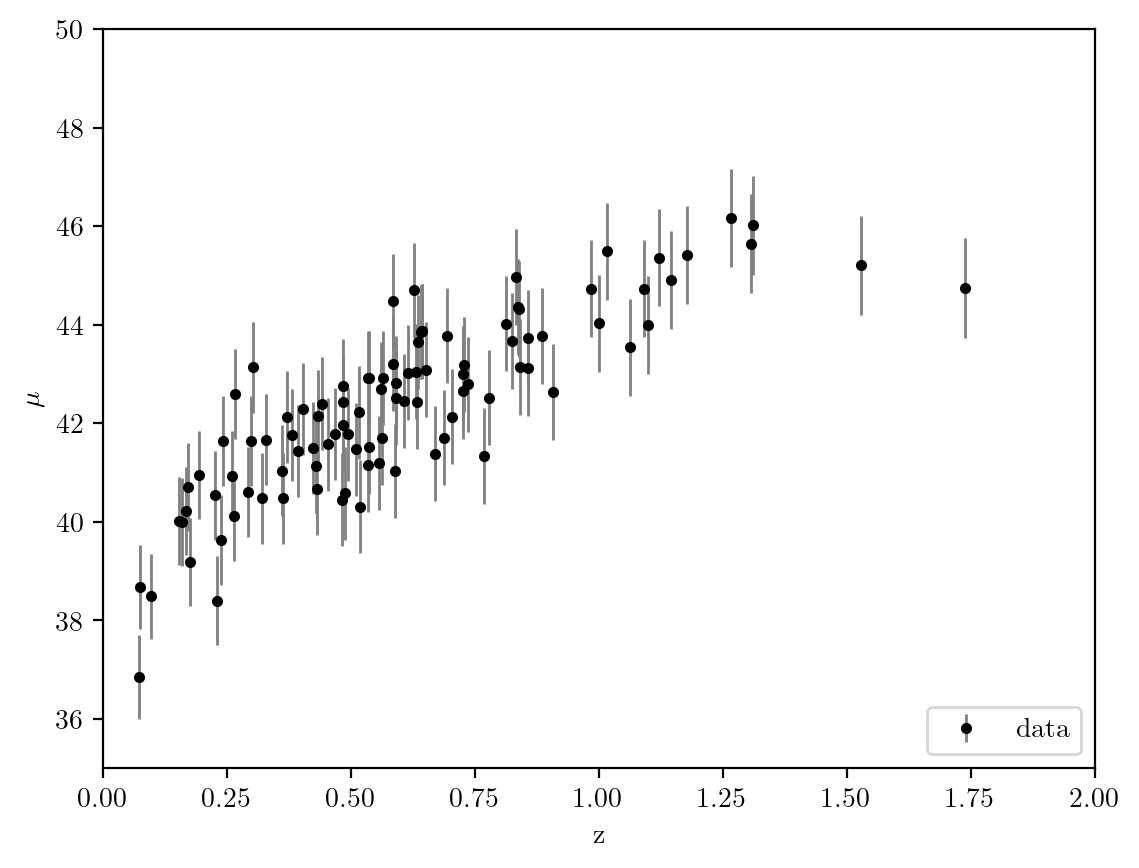

In [160]:
from astroML.datasets import generate_mu_z
z_sample, mu_sample, dmu = generate_mu_z(100, random_state=1234)

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)
plt.show()

####  Tasks

- First, explore fitting this data with the tecniques we have seen.
- Start from linear regression and polynomial regression
- For the case of  polynomial regression, just fit many of them for now.
- Let's bet based on intuition! Which fit is the best?
- In what cases are you underfitting the data?
- In what cases are you overfitting the data?

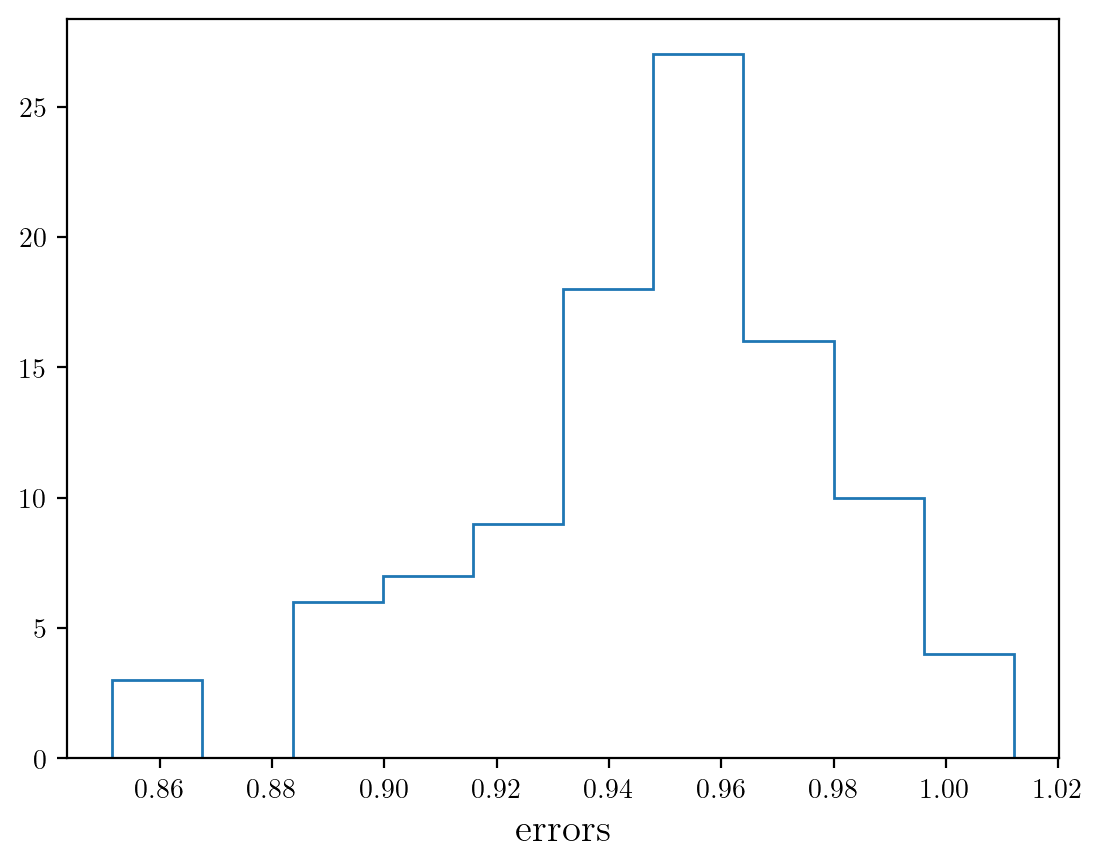

In [161]:
plt.hist(dmu,histtype='step')
plt.xlabel('errors', fontsize=14)
plt.show()

So we are dealing with heteroschedastic errors

#### Linear Fit

In [162]:
z_sample = z_sample.reshape(-1, 1)  # z_sample now has shape (n_samples, 1)

model = LinearRegression()
model.fit(z_sample, mu_sample, dmu)

intercept = model.coef_[0]
slope = model.coef_[1]

print(f'Linear Model\nslope = {slope} - intercept = {intercept}')

Linear Model
slope = 4.764388647749797 - intercept = 39.483846022957295


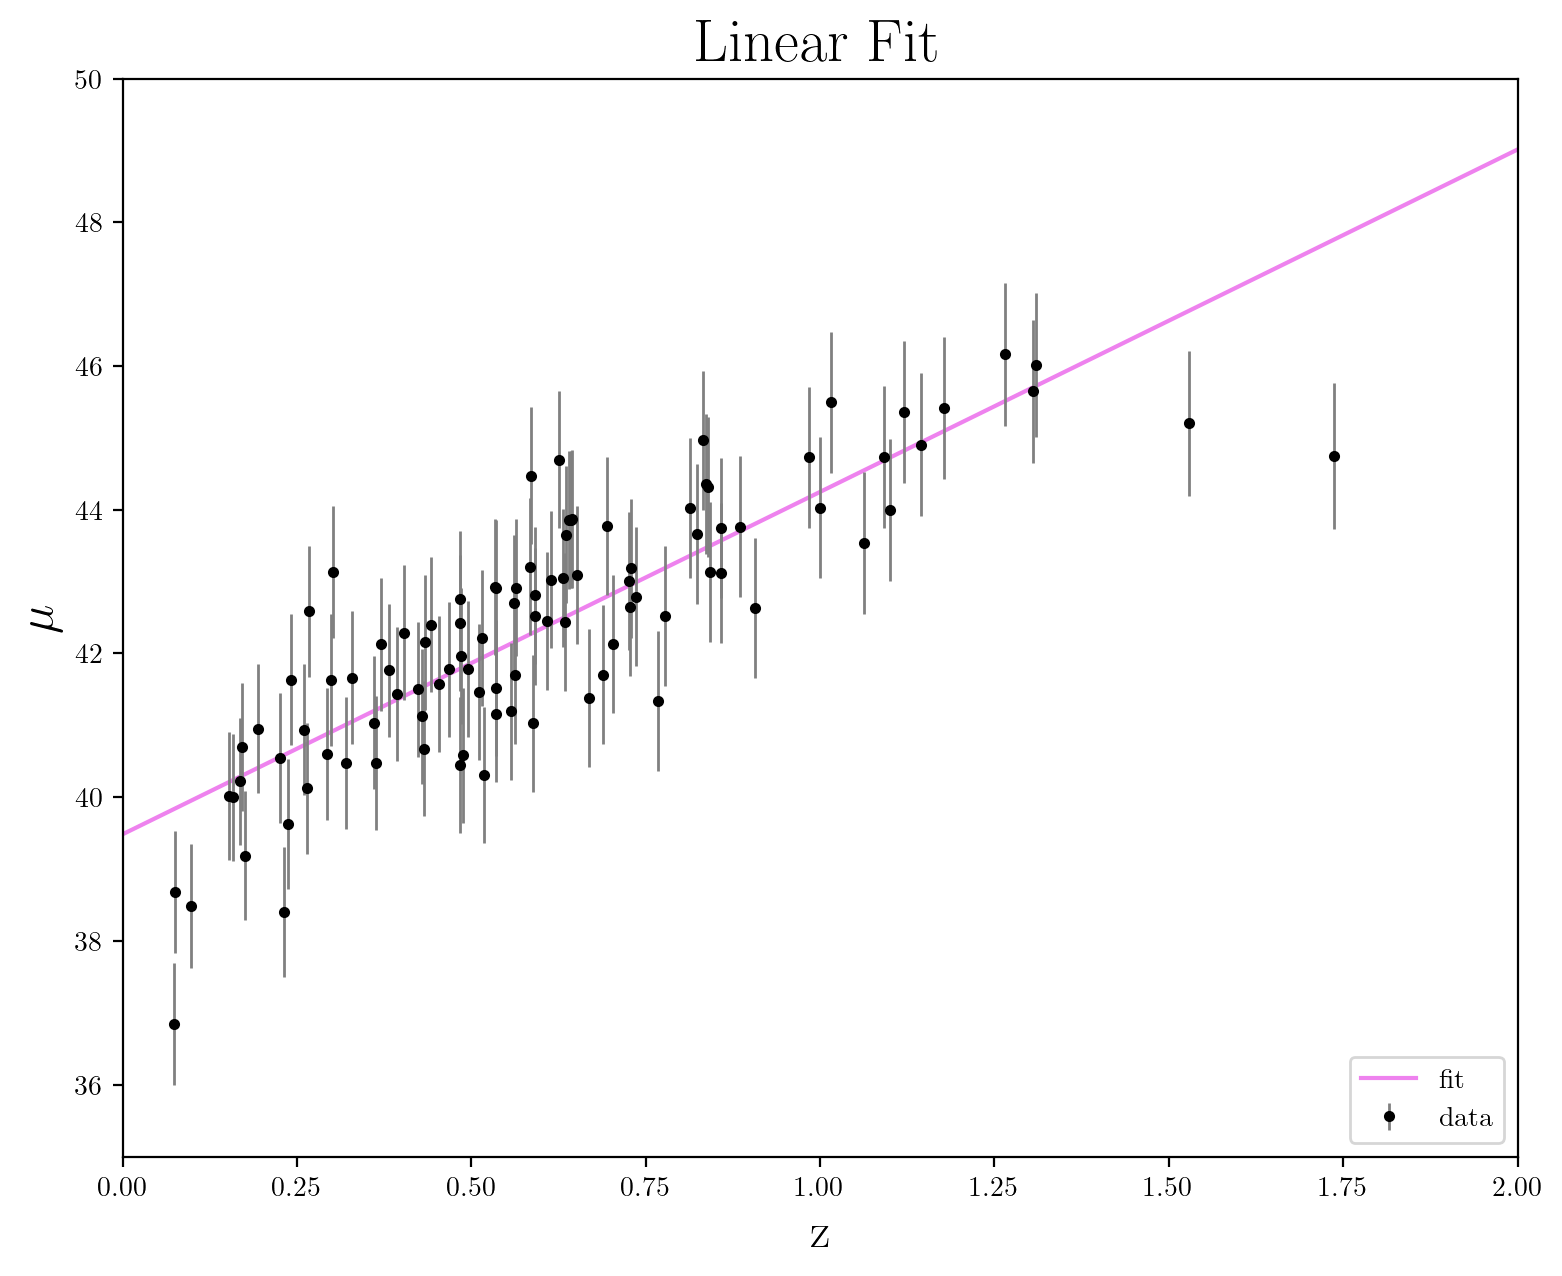

In [163]:
linear_model = lambda z: slope * z + intercept

z_fit = np.linspace(0,2,1000)

plt.figure(figsize=(9, 7))
plt.plot(z_fit, linear_model(z_fit), label='fit', color='violet')

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z", fontsize=18)
plt.ylabel("$\mu$",  fontsize=18)
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)

plt.title('Linear Fit',  fontsize=22)
plt.show()

#### Polynomial Fit

Polynomial Fit with 2 degrees
Parameters: 38.41, 8.60, -2.64

Polynomial Fit with 4 degrees
Parameters: 36.96, 21.50, -34.55, 28.77, -8.39

Polynomial Fit with 6 degrees
Parameters: 35.38, 43.13, -128.74, 210.25, -179.32, 76.99, -13.26

Polynomial Fit with 8 degrees
Parameters: 33.56, 76.71, -328.69, 732.80, -817.31, 366.64, 68.65, -116.43, 28.25

Polynomial Fit with 10 degrees
Parameters: 35.81, 16.23, 266.88, -2231.00, 7700.78, -14744.14, 17108.22, -12332.88, 5411.64, -1327.36, 139.98

Polynomial Fit with 12 degrees
Parameters: -9.28, 1556.46, -20610.84, 149870.46, -667699.36, 1938823.18, -3800879.02, 5115384.27, -4727709.23, 2945599.95, -1180865.10, 274748.28, -28165.33

Polynomial Fit with 14 degrees
Parameters: 83.92, -2271.67, 44561.47, -466207.60, 2982446.52, -12541304.16, 36218636.99, -73785125.72, 107548880.62, -112491954.10, 83661682.51, -43137614.32, 14645725.19, -2942265.90, 264770.68

Polynomial Fit with 16 degrees
Parameters: 15.88, 1064.34, -25060.75, 358806.98, -3275707

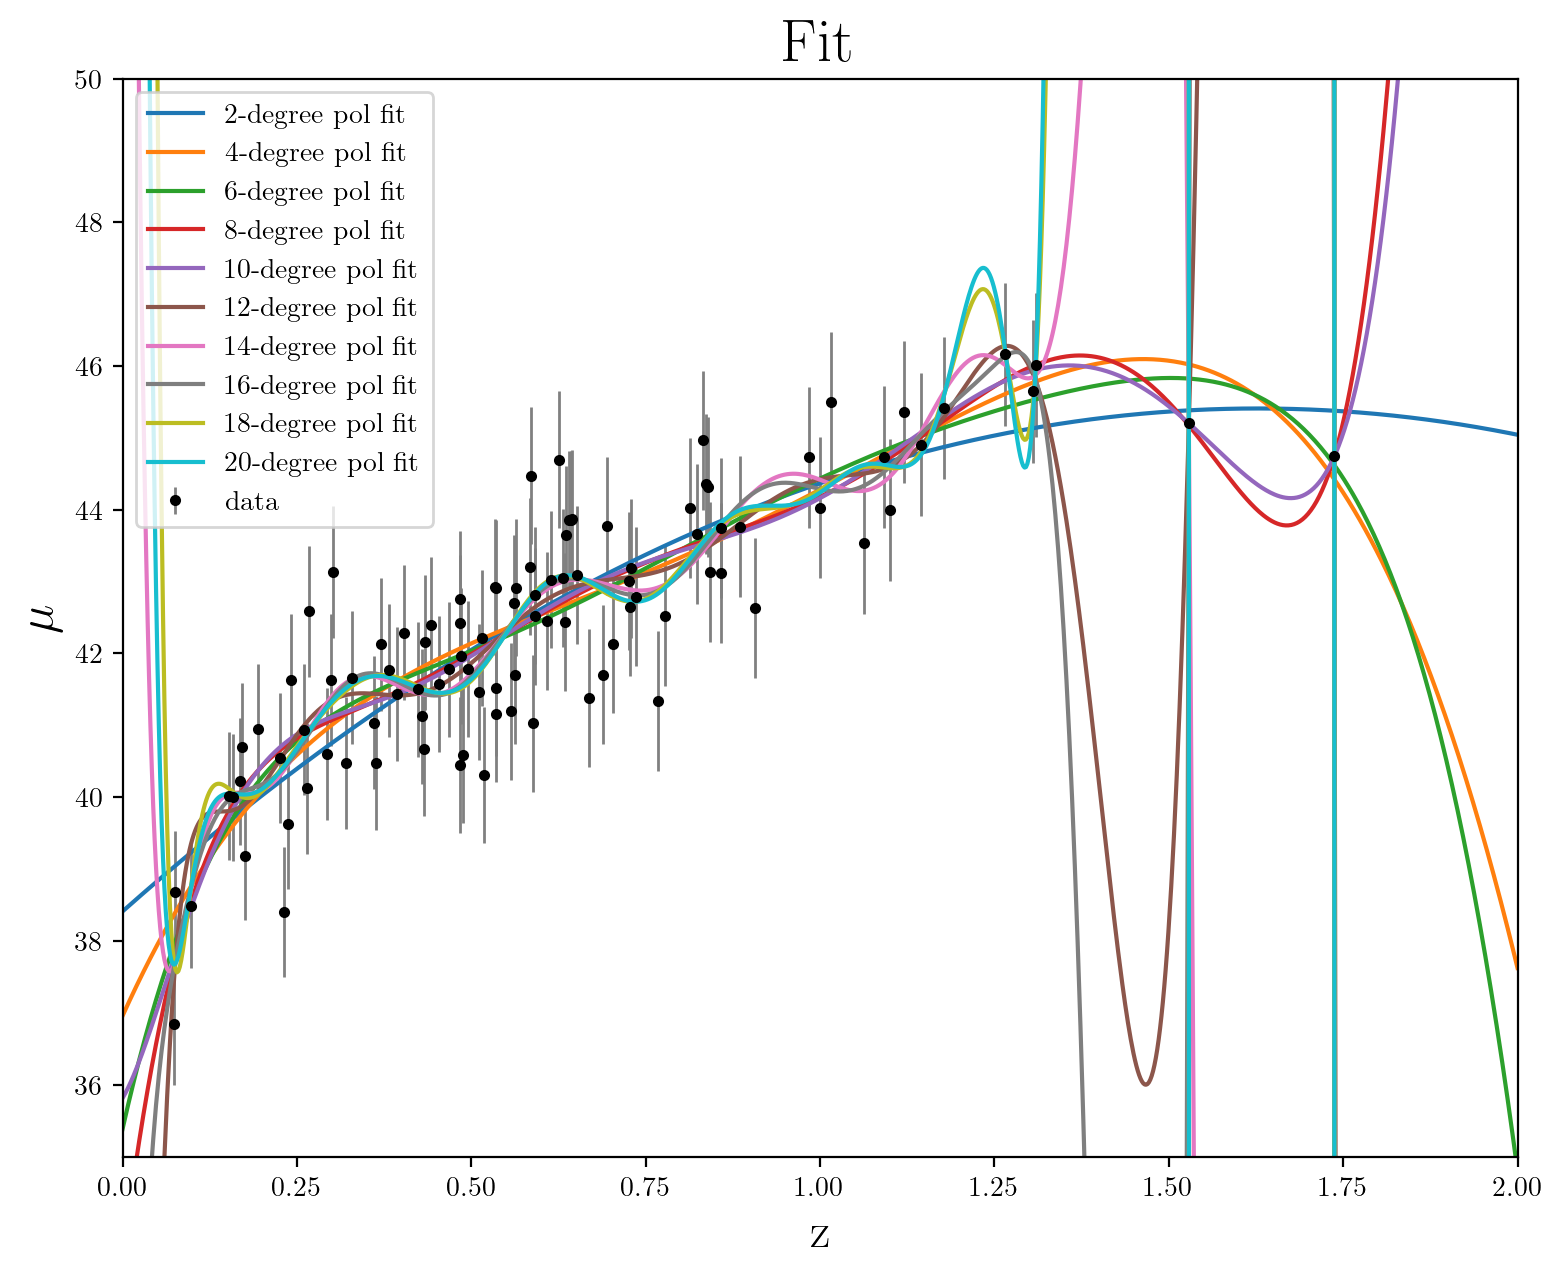

In [164]:
degrees =  np.linspace(2,20,10)

plt.figure(figsize=(9, 7))
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1, label='data')    

for d in degrees:
    
    model = PolynomialRegression(int(d)) 
    model.fit(z_sample, mu_sample, dmu)
    formatted_coefs = ', '.join([f'{coef:.2f}' for coef in model.coef_]) #to have only 2 decimals
    print(f'Polynomial Fit with {int(d)} degrees\nParameters: {formatted_coefs}\n')

    polynomial_model = lambda z: np.polyval(model.coef_[::-1], z)  # polyval wants coeff in descending power

    plt.plot(z_fit, polynomial_model(z_fit), label=f'{int(d)}-degree pol fit')

plt.xlabel("z", fontsize=18)
plt.ylabel("$\mu$", fontsize=18)
plt.legend(loc='upper left')
plt.xlim(0, 2)
plt.ylim(35, 50)
plt.title(f'Fit', fontsize=22)
plt.show()

Intuitively I would say that 2 degrees polynomial fits can fit well the data and so for the Occam's Razor I prefer the 2 degrees polynomial as a model.

- With the Linear Fit I am underfitting the data
- With Polynomial Fits with 8 degrees or more I am overfitting 

#### Tasks

- Now split the data into training and validation sets
- Implement a cross-validation procedure
- Pick the best!
- Does it agree with our bets?

Best model degree: 5 
Cross-validation error: 0.9128


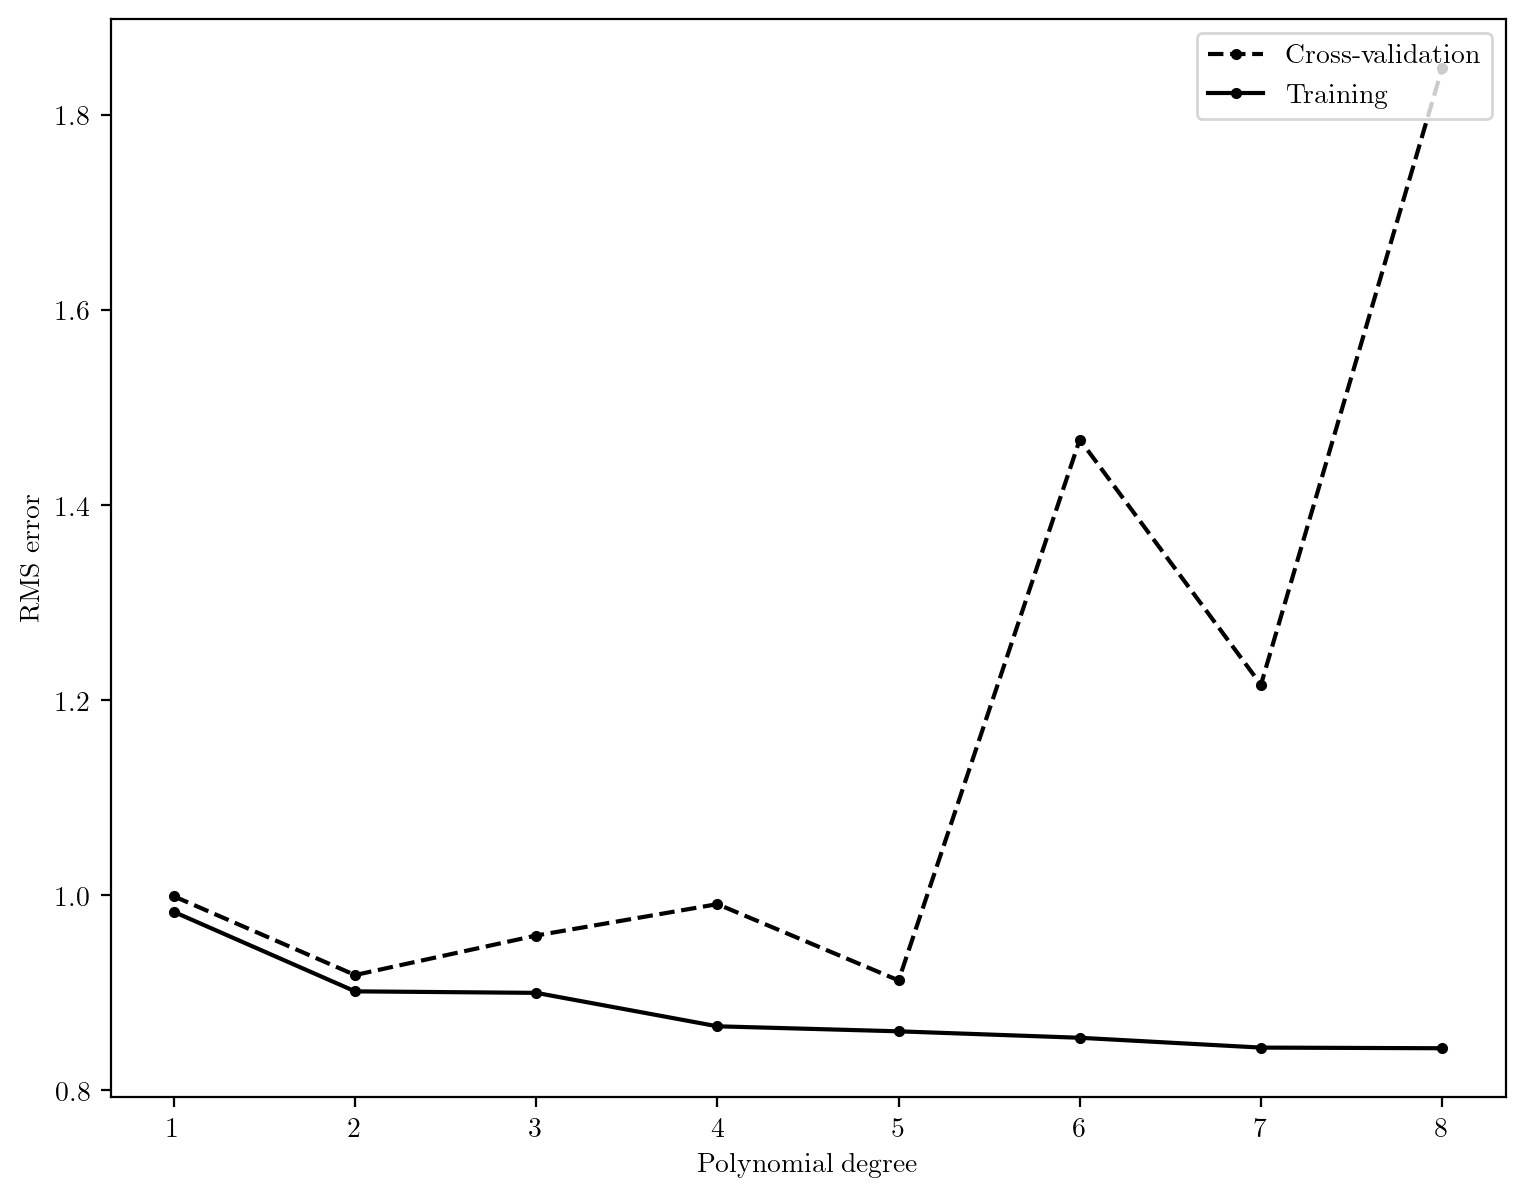

(I am plotting only the first 8 to show the minimum)


In [165]:
degrees = np.linspace(1, 14, 14, dtype=int)
training_err = []
crossval_err = []
k = 5  #n of folds

kf = KFold(n_splits=k, shuffle=True, random_state=13)

for d in degrees:
    model = PolynomialRegression(d) 
    fold_train_errors = []
    fold_val_errors = []
    
    for train_idx, val_idx in kf.split(z_sample):
    
        z_train, z_val = z_sample[train_idx], z_sample[val_idx]
        mu_train, mu_val = mu_sample[train_idx], mu_sample[val_idx]
        dmu_train, dmu_val = dmu[train_idx], dmu[val_idx]
        
        model.fit(z_train.reshape(-1, 1), mu_train, dmu_train)
        
        train_pred = model.predict(z_train.reshape(-1, 1))
        val_pred = model.predict(z_val.reshape(-1, 1))
        
        fold_train_errors.append(np.sqrt(np.mean((train_pred - mu_train) ** 2)))
        fold_val_errors.append(np.sqrt(np.mean((val_pred - mu_val) ** 2)))
    
    #average error
    training_err.append(np.mean(fold_train_errors))
    crossval_err.append(np.mean(fold_val_errors))

best_degree = degrees[np.argmin(crossval_err)]
best_cv_error = min(crossval_err)
print(f'Best model degree: {best_degree} \nCross-validation error: {best_cv_error:.4f}')

plt.figure(figsize=(9, 7))
plt.plot(degrees[:8], crossval_err[:8], '--k', marker='.', label='Cross-validation')
plt.plot(degrees[:8], training_err[:8], '-k', marker='.', label='Training')
plt.xlabel('Polynomial degree')
plt.ylabel('RMS error')
plt.xticks(degrees[:8])
plt.legend(loc='upper right')
plt.show()

print('(I am plotting only the first 8 to show the minimum)')

In [166]:
print(f'Cross Validation error for 3 degrees: {crossval_err[2]:.4f}')

Cross Validation error for 3 degrees: 0.9589


So actually the polynomial with 3 degrees has a cross val error very close to the one with 5 degrees and so I am not sure that it's worthy to make the model more complex adding 2 parameters for gaining so low

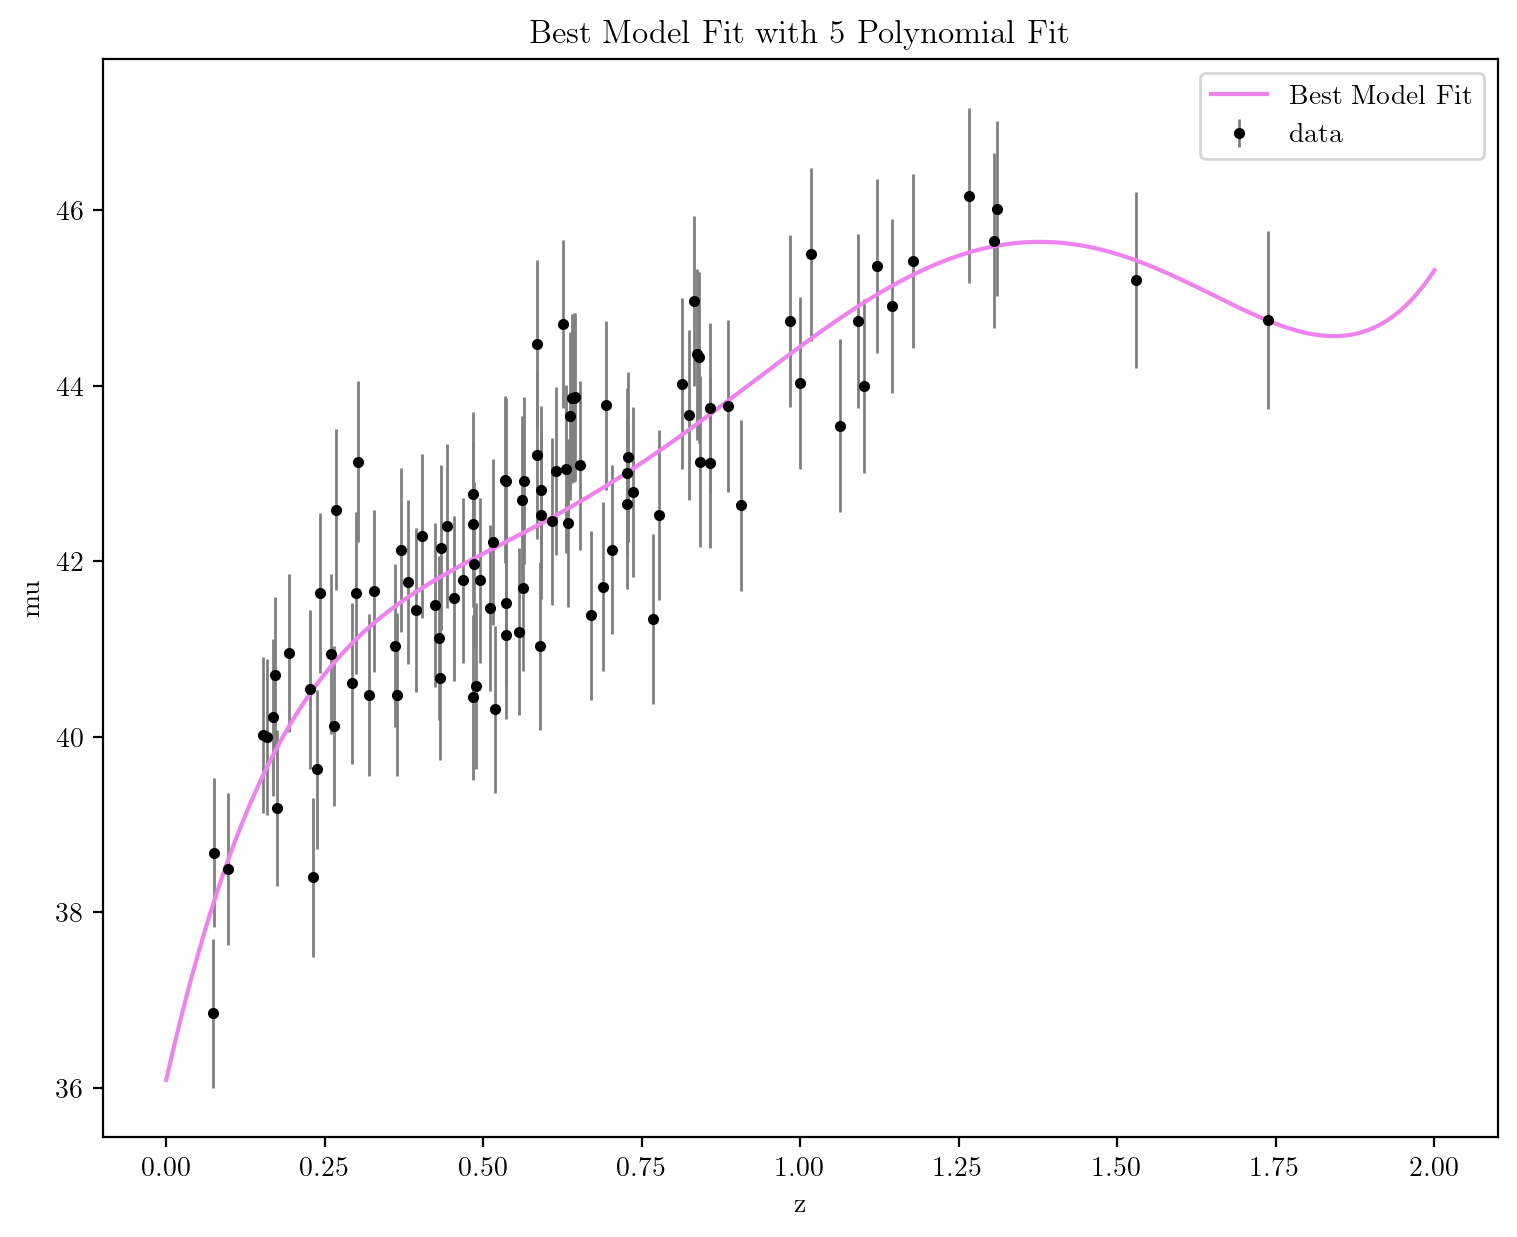

In [167]:
#fiting best model
polynomial_model = lambda z: np.polyval(best_model.coef_[::-1], z)  # polyval wants coeff in descending power

best_model = PolynomialRegression(int(best_degree))
best_model.fit(z_sample, mu_sample, dmu)

plt.figure(figsize=(9, 7))
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1, label='data')    
plt.plot(z_fit, polynomial_model(z_fit), label='Best Model Fit', color='violet')
plt.xlabel('z')
plt.ylabel('mu')
plt.title(f'Best Model Fit with {int(best_degree)} Polynomial Fit')
plt.legend()
plt.show()

#### If you have time (or later at home...)

- Repeat with Basis Function Regression and Kernel Regression
- Explore what happens when you change the number of datapoints and plot the resulting learning curves.

## Basis Function Regression

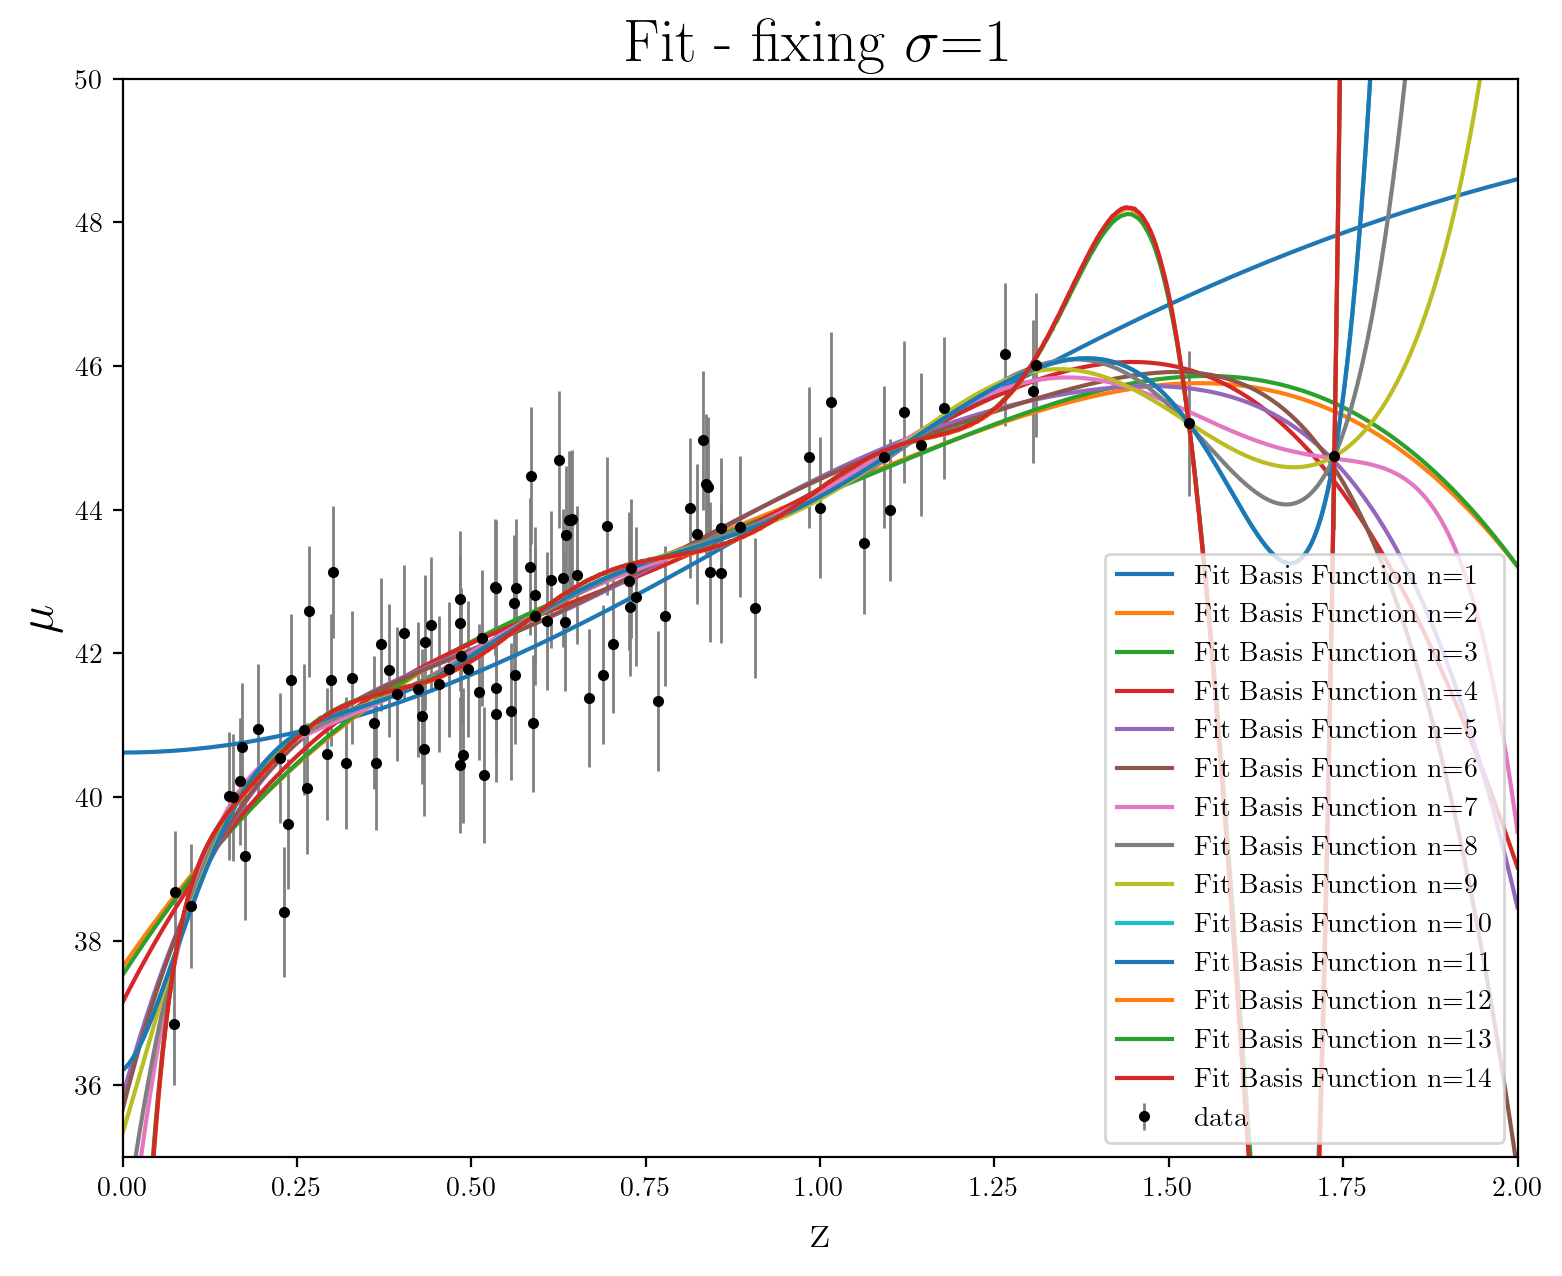

In [168]:
plt.figure(figsize=(9, 7))
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1, label='data')    
    
sigma_test = 1

for n in degrees:
 
    z_gridtest = np.linspace(0,2,int(n))[:, None]
    
    model = BasisFunctionRegression('gaussian', mu=z_gridtest, sigma=sigma_test)
    model.fit(z_sample, mu_sample, dmu)
    
    mu_pred = model.predict(z_fit[:,np.newaxis])

    plt.plot(z_fit, mu_pred, label=f'Fit Basis Function n={n}')
        
plt.xlabel("z", fontsize=18)
plt.ylabel("$\mu$", fontsize=18)
plt.legend(loc='lower right')
plt.xlim(0, 2)
plt.ylim(35, 50)
plt.title(f'Fit - fixing $\sigma$=1', fontsize=22)
plt.show()

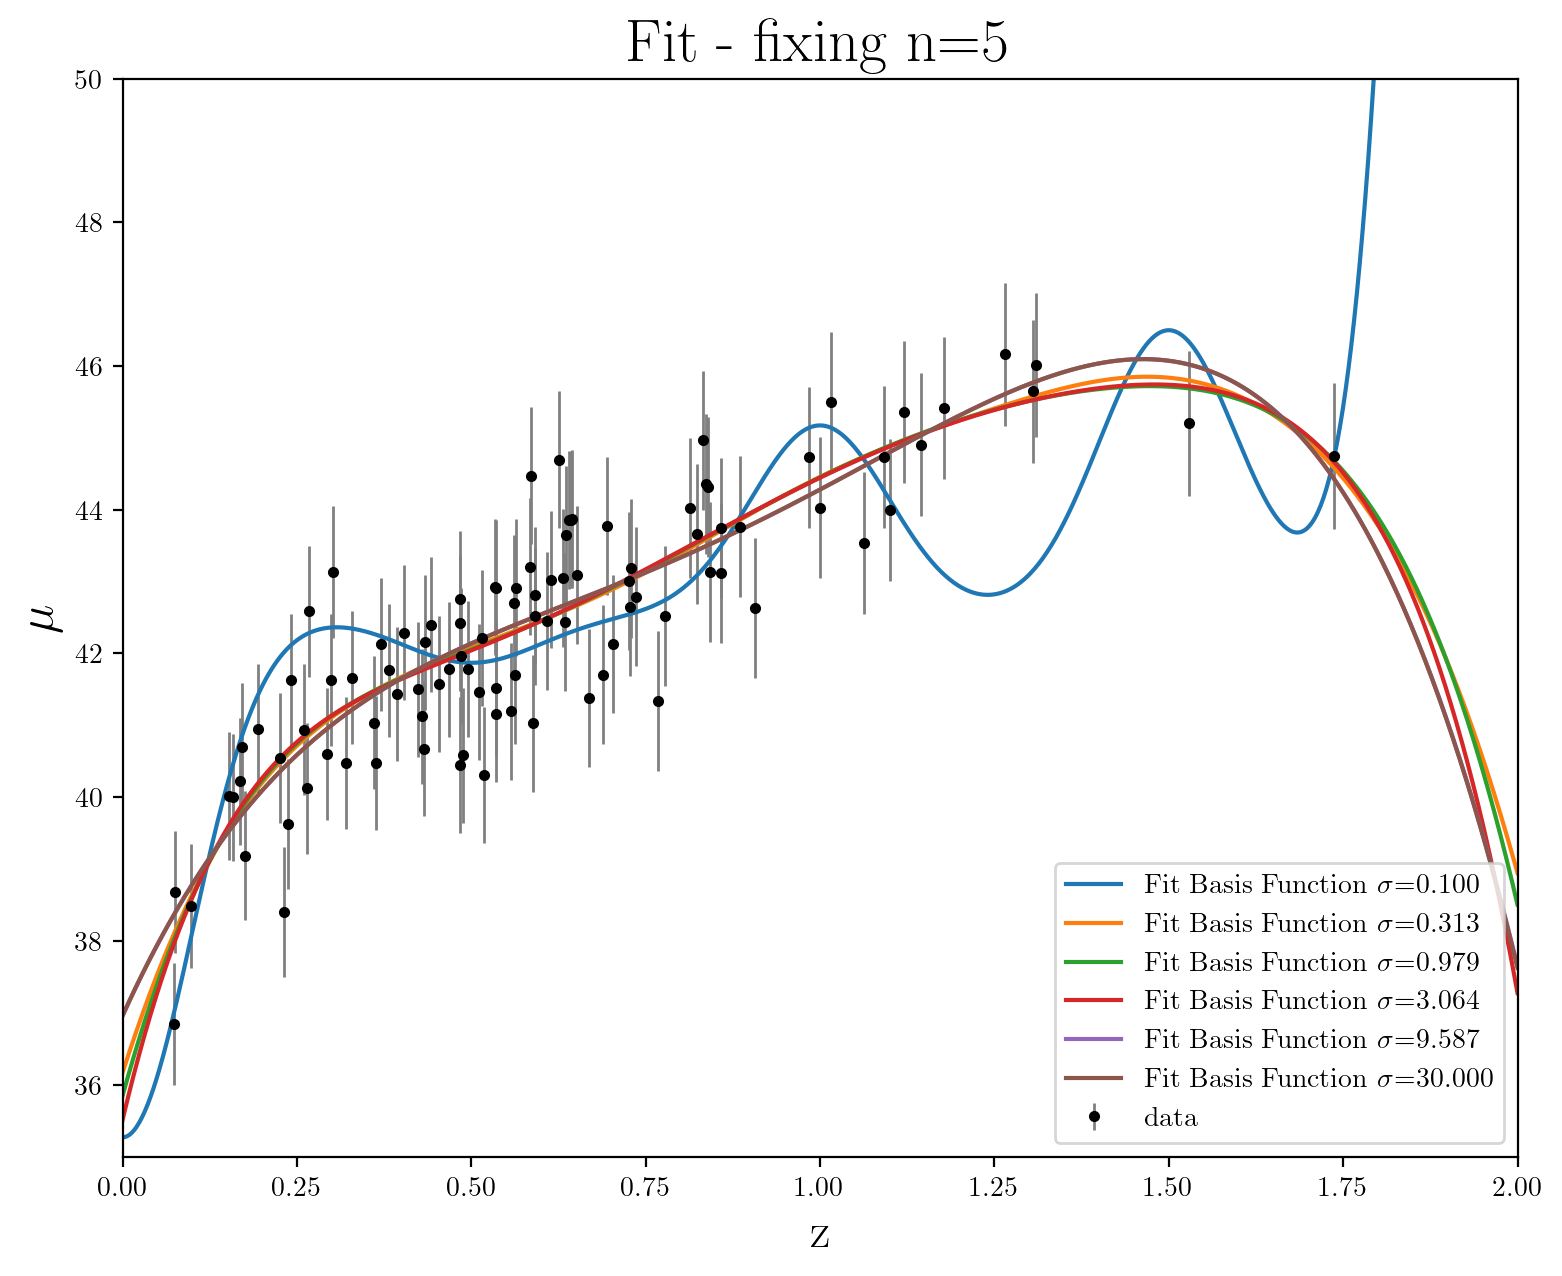

In [169]:
plt.figure(figsize=(9, 7))
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1, label='data')    
    
sigma = np.geomspace(0.1, 30, 6)

for s in sigma:
 
    z_gridtest = np.linspace(0,2,5)[:, None]
    
    model = BasisFunctionRegression('gaussian', mu=z_gridtest, sigma=s)
    model.fit(z_sample, mu_sample, dmu)
    
    mu_pred = model.predict(z_fit[:,np.newaxis])
    
    plt.plot(z_fit, mu_pred, label=f'Fit Basis Function $\sigma$={s:.3f}')
        
plt.xlabel("z", fontsize=18)
plt.ylabel("$\mu$", fontsize=18)
plt.legend(loc='lower right')
plt.xlim(0, 2)
plt.ylim(35, 50)
plt.title(f'Fit - fixing n=5', fontsize=22)
plt.show()

Changing the sigma doesn't affect the fit that much, unless you have a very little sigma like 0.1 and so you're clearly overfitting.

So I will do K fold cross validation only on n.

Best model with 5 gaus basis functions 
Cross-validation error:0.9093


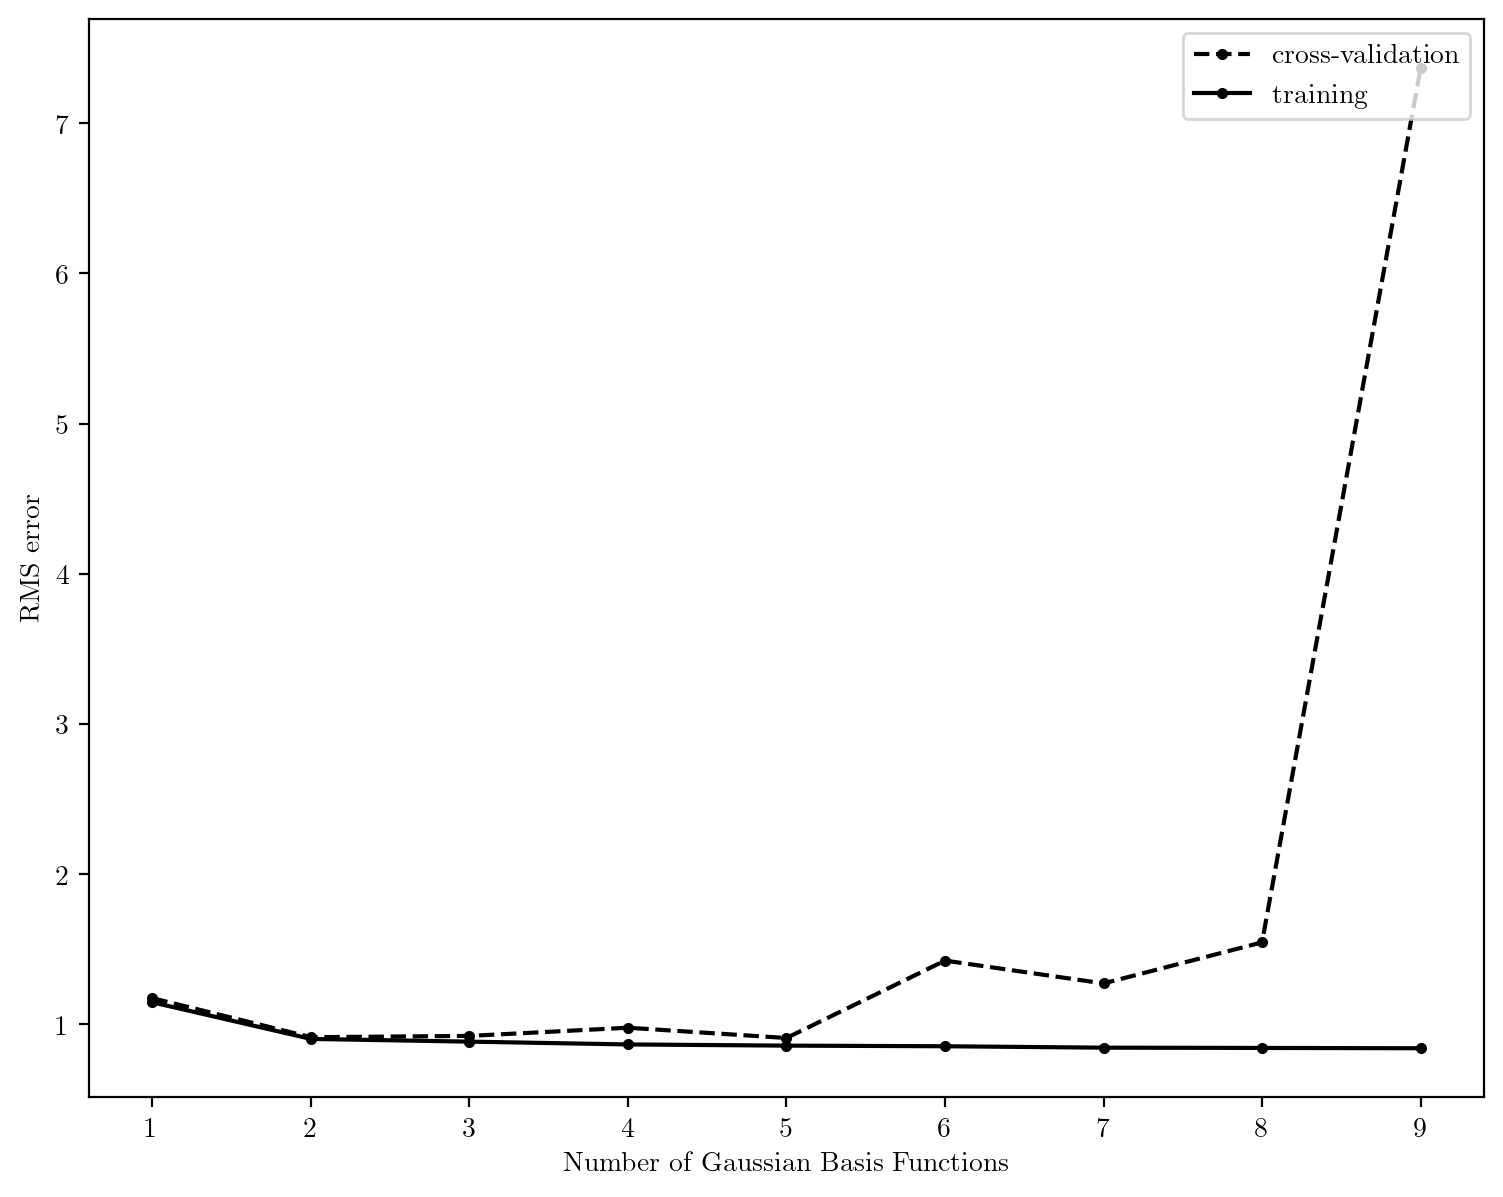

In [170]:
degrees = np.linspace(1, 20, 20)

training_err = []
crossval_err = []

for n in degrees:
    training_errors = []
    crossval_errors = []
    
    for train_index, val_index in kf.split(z_sample):
        z_train, z_val = z_sample[train_index], z_sample[val_index]
        mu_train, mu_val = mu_sample[train_index], mu_sample[val_index]
        dmu_train, dmu_val = dmu[train_index], dmu[val_index]
        
        z_gridtest = np.linspace(0, 2, int(n))[:, None]
        
        model = BasisFunctionRegression('gaussian', mu=z_gridtest, sigma=1.5)
        model.fit(z_train, mu_train, dmu_train)
        
        train_pred = model.predict(z_train.reshape(-1, 1))
        val_pred = model.predict(z_val.reshape(-1, 1))
        
        training_errors.append(np.sqrt(np.mean((train_pred - mu_train) ** 2)))
        crossval_errors.append(np.sqrt(np.mean((val_pred - mu_val) ** 2)))
    
    training_err.append(np.mean(training_errors))
    crossval_err.append(np.mean(crossval_errors))

best_n = int(degrees[np.argmin(crossval_err)])
print(f"Best model with {best_n} gaus basis functions \nCross-validation error:{min(crossval_err):.4f}")

plt.figure(figsize=(9, 7))
plt.plot(degrees[:9], crossval_err[:9], '--k', marker='.', label='cross-validation')
plt.plot(degrees[:9], training_err[:9], '-k', marker='.', label='training')
plt.xlabel('Number of Gaussian Basis Functions')
plt.ylabel('RMS error')
plt.xticks(degrees[:9])
plt.legend(loc='upper right')
plt.show()


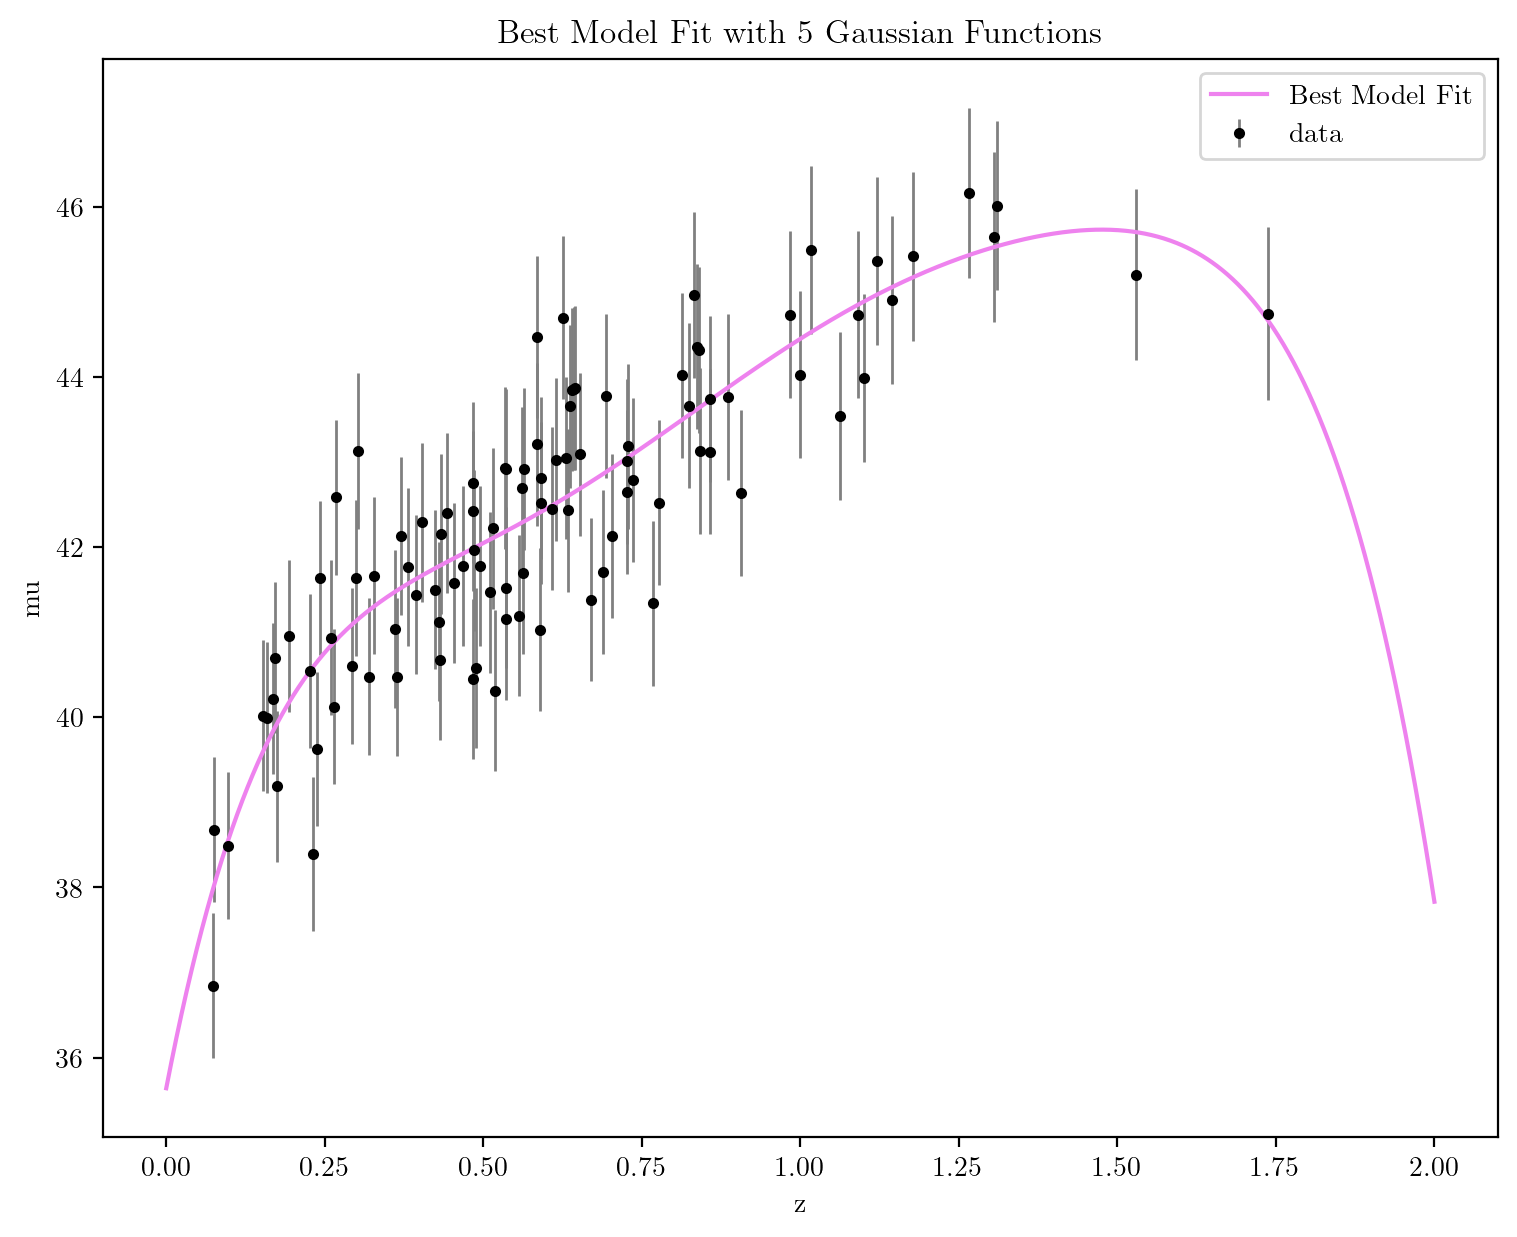

In [171]:
#fiting best model
z_gridtest = np.linspace(0, 2, int(best_n))[:, None]
best_model = BasisFunctionRegression('gaussian', mu=z_gridtest, sigma=1.5)
best_model.fit(z_sample, mu_sample, dmu)

mu_fit = best_model.predict(z_fit[:, None])

plt.figure(figsize=(9, 7))
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1, label='data')    
plt.plot(z_fit, mu_fit, color='violet', label='Best Model Fit')
plt.xlabel('z')
plt.ylabel('mu')
plt.title(f'Best Model Fit with {int(best_degree)} Gaussian Functions')
plt.legend()
plt.show()

### Learning Curve with the best model

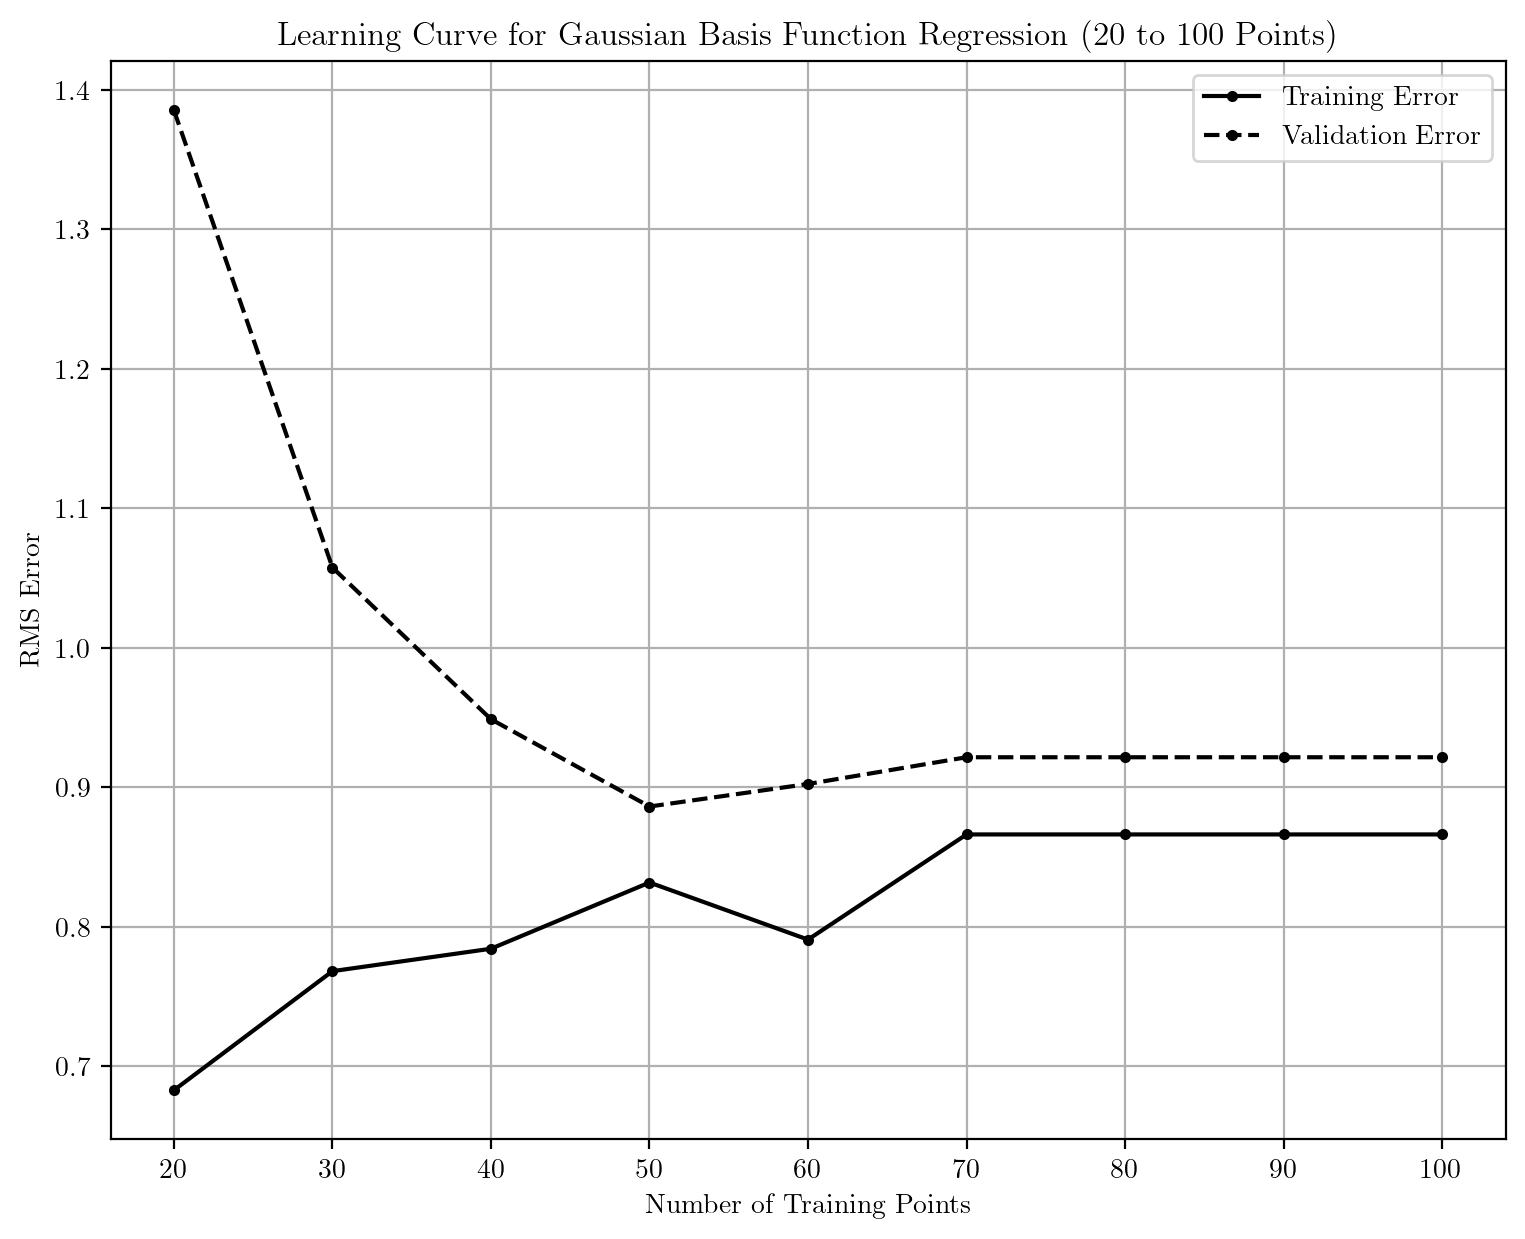

In [172]:
best_n = degrees[np.argmin(crossval_err)]
sigma_test = 1.5 

train_sizes = np.arange(20, 101, 10)  # From 20 to 100 in steps of 10
train_errors = []
val_errors = []


z_train, z_val, mu_train, mu_val, dmu_train, dmu_val = train_test_split(z_sample, mu_sample, dmu, test_size=0.3, random_state=7)

for size in train_sizes:
    z_gridtest = np.linspace(0, 2, int(best_n))[:, None]
    
    model = BasisFunctionRegression('gaussian', mu=z_gridtest, sigma=sigma_test)
    X_train = z_train[:size]
    mu_train_subset = mu_train[:size]
    dmu_train_subset = dmu_train[:size]
    
    model.fit(X_train, mu_train_subset, dmu_train_subset)
    
    train_pred = model.predict(X_train)
    val_pred = model.predict(z_val)
    
    train_errors.append(np.sqrt(np.mean((train_pred - mu_train_subset) ** 2)))
    val_errors.append(np.sqrt(np.mean((val_pred - mu_val) ** 2)))

plt.figure(figsize=(9, 7))
plt.plot(train_sizes, train_errors, 'k', marker='.', label='Training Error')
plt.plot(train_sizes, val_errors, '--k', marker='.', label='Validation Error')
plt.xlabel('Number of Training Points')
plt.ylabel('RMS Error')
plt.title('Learning Curve for Gaussian Basis Function Regression (20 to 100 Points)')
plt.legend(loc='upper right')
plt.grid()
plt.show()

With 100 training points we have training and validation error that reach the same low value so the number of points are enough. 

## Kernel Regression

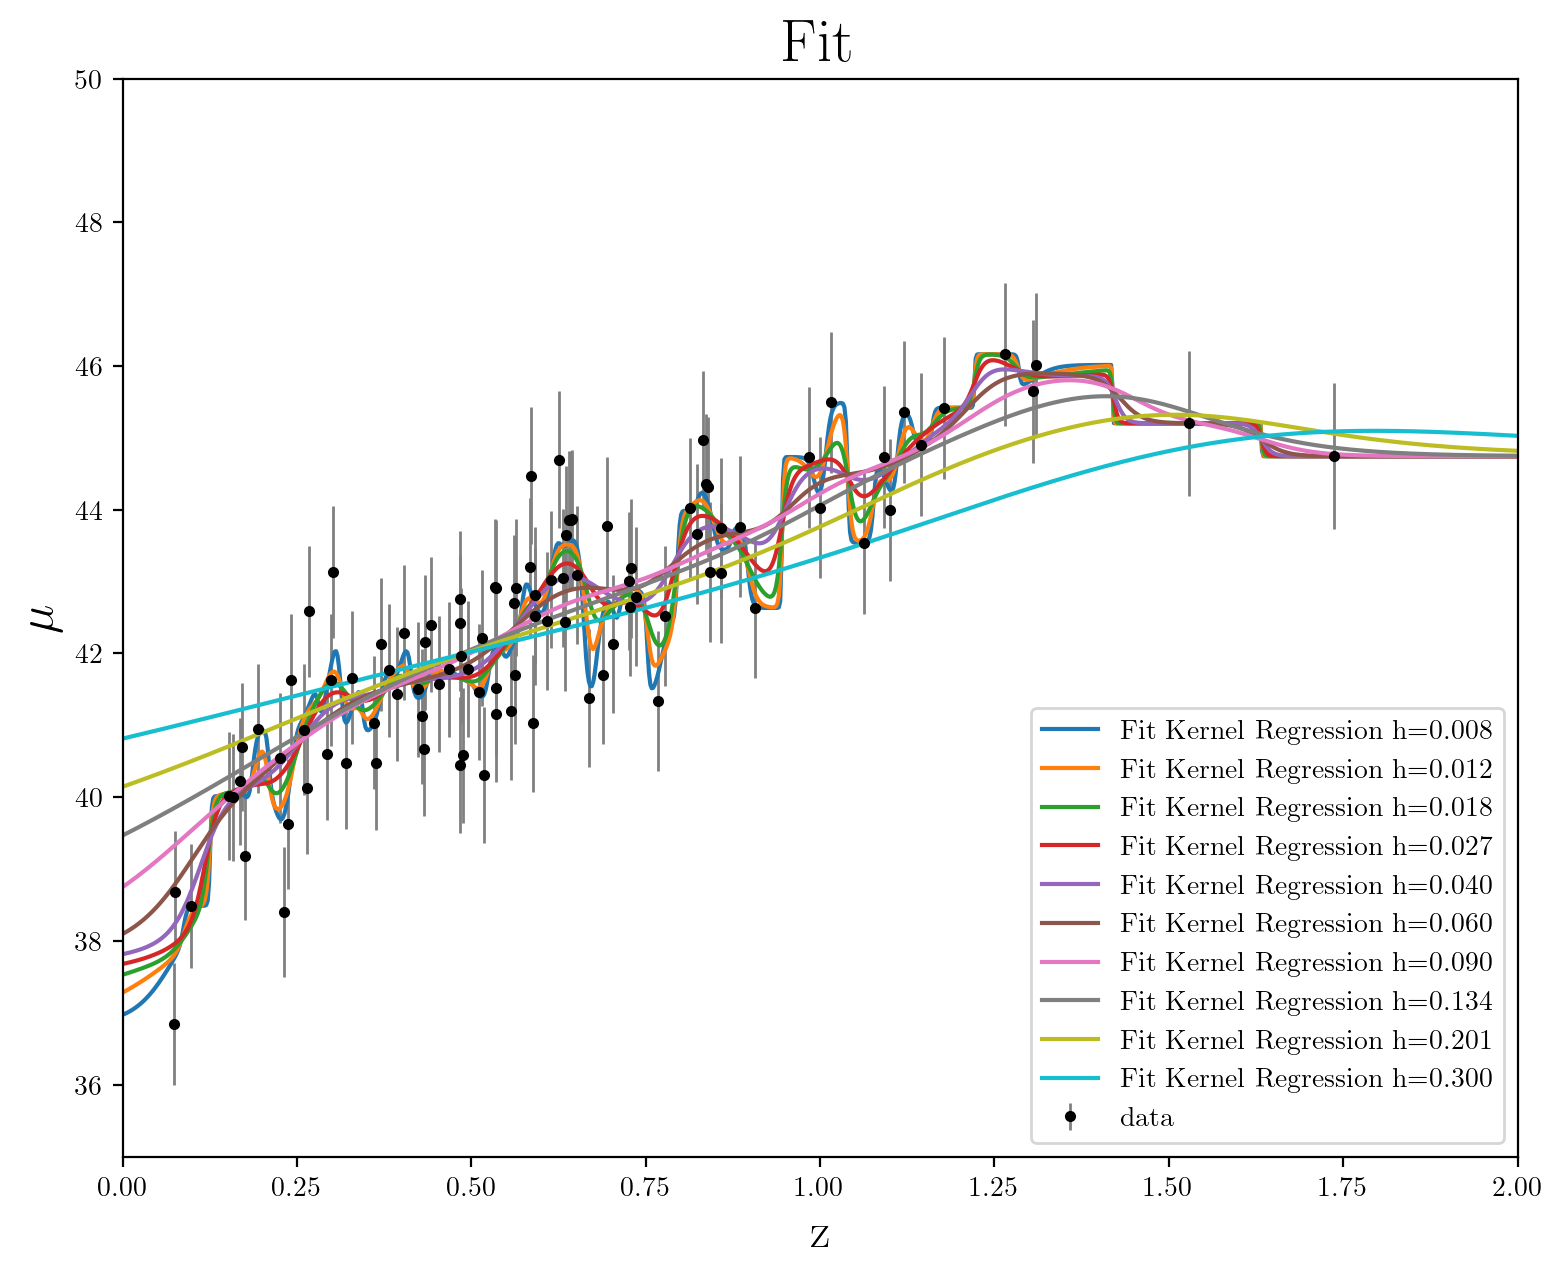

In [173]:
bandw = np.geomspace(0.008, 0.3, 10)

plt.figure(figsize=(9, 7))
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1, label='data')    
    
sigma_test = 1

for h in bandw:

    model = NadarayaWatson(kernel='gaussian', h=h)
    model.fit(z_sample, mu_sample, dmu)
    
    mu_pred = model.predict(z_fit[:,np.newaxis])
    
    plt.plot(z_fit, mu_pred, label=f'Fit Kernel Regression h={h:.3f}')
        
plt.xlabel("z", fontsize=18)
plt.ylabel("$\mu$", fontsize=18)
plt.legend(loc='lower right')
plt.xlim(0, 2)
plt.ylim(35, 50)
plt.title(f'Fit', fontsize=22)
plt.show()

Best model with bandwidth:0.0368 
Cross-validation error:0.8769


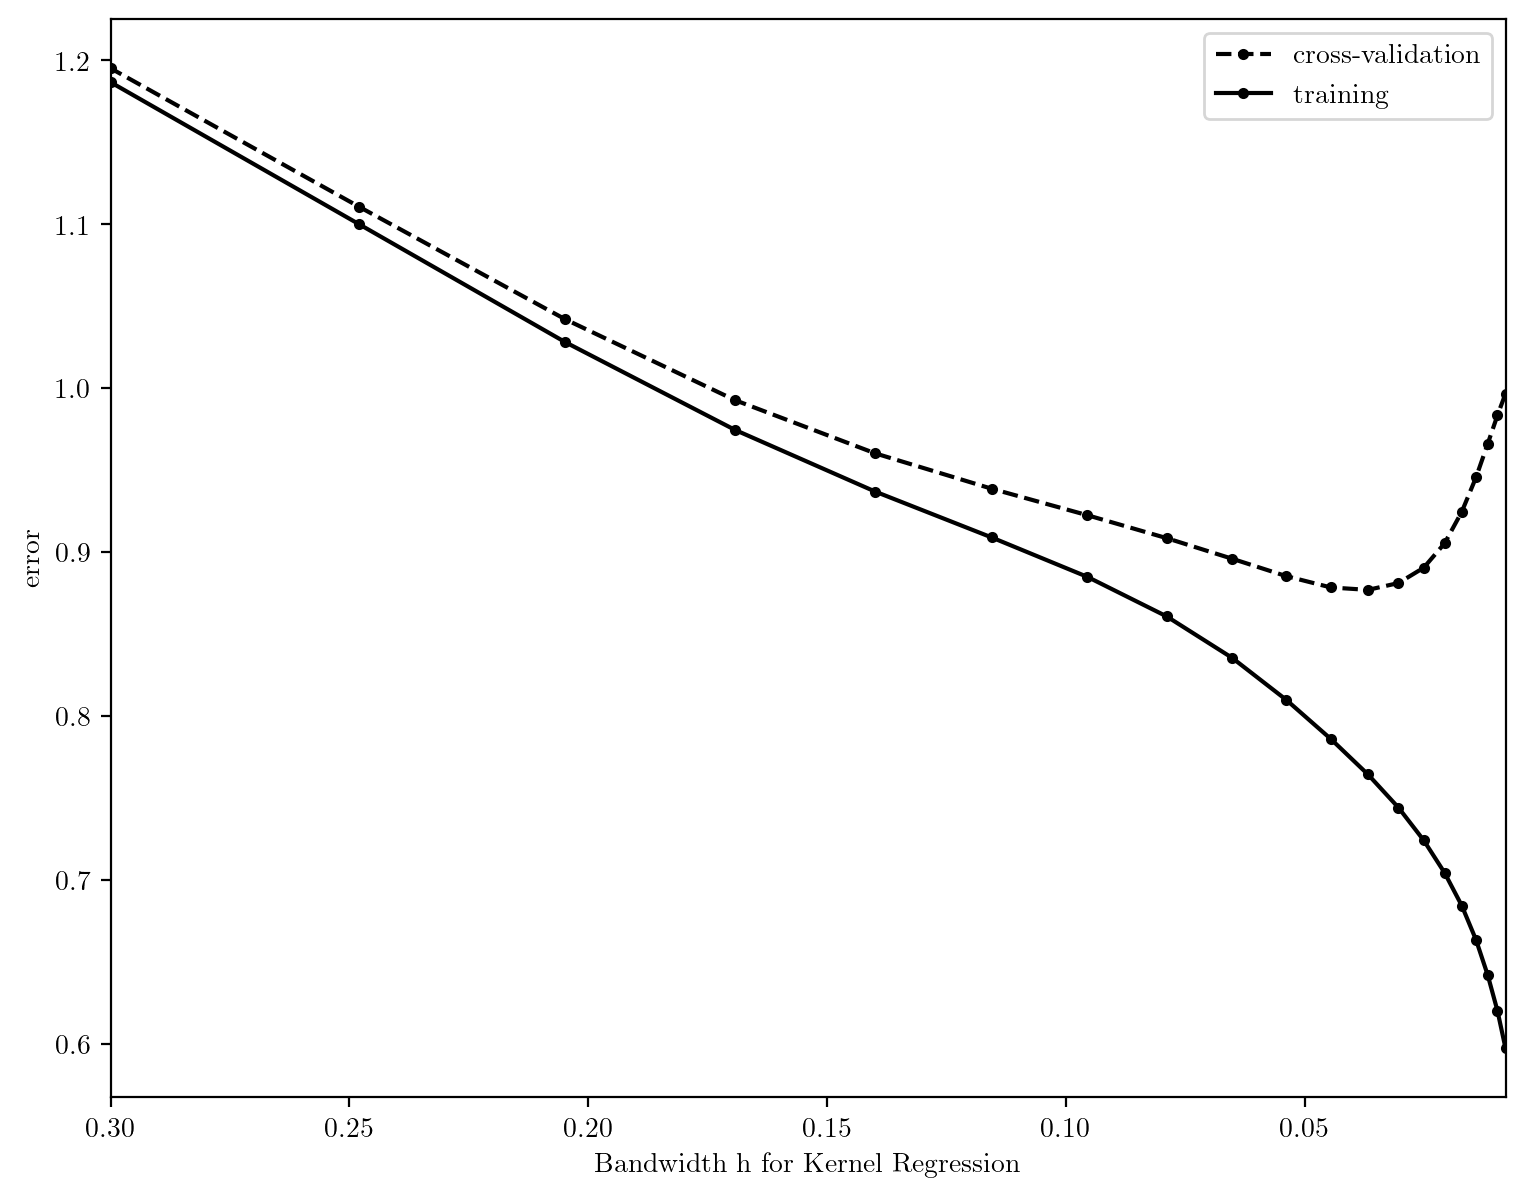

In [174]:
bandw = np.geomspace(0.008, 0.3, 20)

training_err = []
crossval_err = []

for h in bandw:
    train_errors = []
    val_errors = []

    for train_index, val_index in kf.split(z_sample):
        z_train, z_val = z_sample[train_index], z_sample[val_index]
        mu_train, mu_val = mu_sample[train_index], mu_sample[val_index]
        dmu_train, dmu_val = dmu[train_index], dmu[val_index]

        model = NadarayaWatson(kernel='gaussian', h=h)
        model.fit(z_train, mu_train, dmu_train)

        train_pred = model.predict(z_train.reshape(-1, 1))
        val_pred = model.predict(z_val.reshape(-1, 1))

        train_errors.append(np.sqrt(np.mean((train_pred - mu_train) ** 2)))
        val_errors.append(np.sqrt(np.mean((val_pred - mu_val) ** 2)))

    training_err.append(np.mean(train_errors))
    crossval_err.append(np.mean(val_errors))

print(f"Best model with bandwidth:{bandw[np.argmin(crossval_err)]:.4f} \nCross-validation error:{min(crossval_err):.4f}")

plt.figure(figsize=(9, 7))
plt.plot(bandw, crossval_err, '--k', marker='.', label='cross-validation')
plt.plot(bandw, training_err, '-k', marker='.', label='training')
plt.xlabel('Bandwidth h for Kernel Regression')
plt.xlim(bandw[-1], bandw[0])
plt.ylabel('error')
plt.legend(loc='upper right')
plt.show()

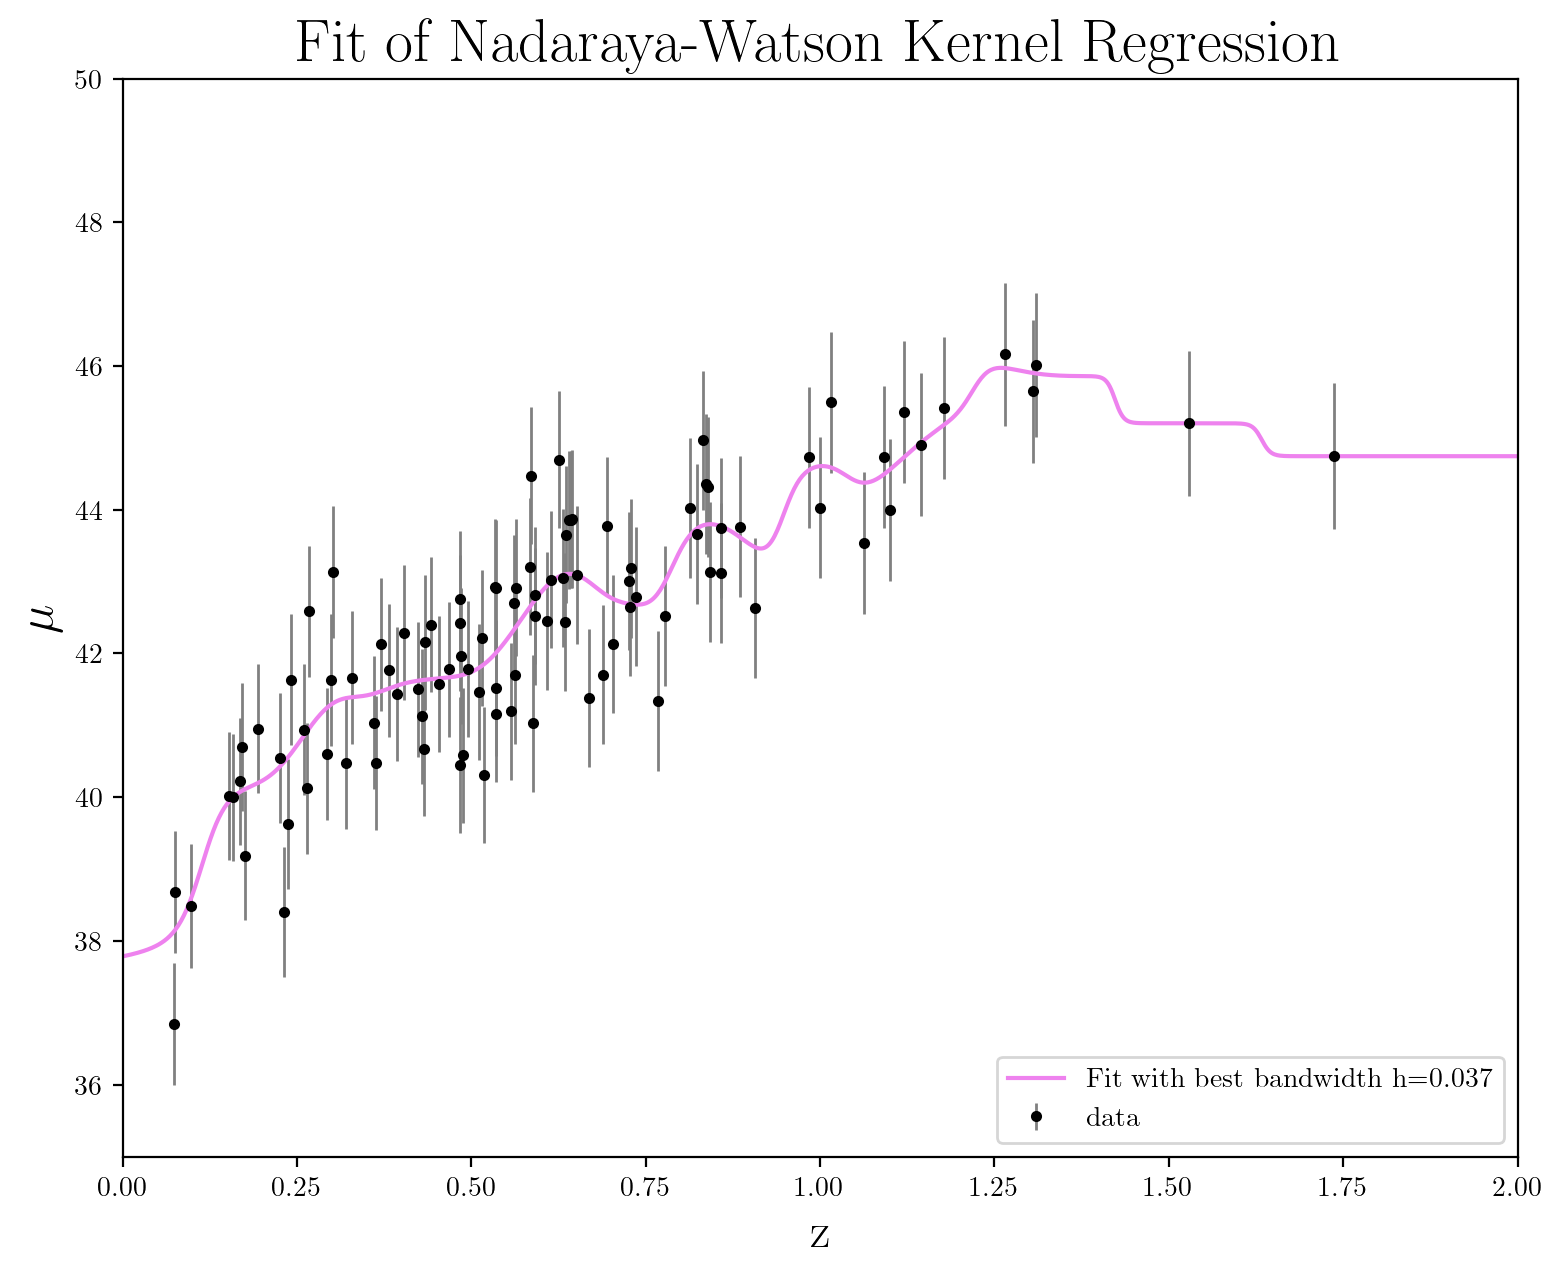

In [175]:
best_bandwidth = bandw[np.argmin(crossval_err)]
best_model = NadarayaWatson(kernel='gaussian', h=best_bandwidth)
best_model.fit(z_sample, mu_sample, dmu)

mu_pred = best_model.predict(z_fit[:,None])

plt.figure(figsize=(9, 7))
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1, label='data')    
plt.plot(z_fit, mu_pred, color='violet', label=f'Fit with best bandwidth h={best_bandwidth:.3f}')
plt.xlabel('z', fontsize=18)
plt.ylabel('$\mu$', fontsize=18)
plt.title('Fit of Nadaraya-Watson Kernel Regression', fontsize=22)
plt.legend(loc='lower right')
plt.xlim(0, 2)
plt.ylim(35, 50)
plt.show()


## Cross Validation on the 3 best models to see which one is the best (of the bests?)

From a very stricht point of view I should have saved some of my data just for this cross-validation here of I should have done everything together, tuning hyperpar of the single model and the choice of the model. 
In this case I have the opportunity to generate different data using the same distribution so I'll do it

In [178]:
z_sample, mu_sample, dmu = generate_mu_z(100, random_state=8)

In [179]:
z_gridtest = np.linspace(0, 2, int(best_n))[:, None]
models = {
    "Polynomial": PolynomialRegression(best_degree),
    "Gaussian Basis": BasisFunctionRegression('gaussian', mu=z_gridtest, sigma=1.5),
    "Kernel": NadarayaWatson(kernel='gaussian', h=best_bandwidth)
}

kf = KFold(n_splits=5, shuffle=True, random_state=78)
crossval_errors = {model_name: [] for model_name in models.keys()} #dict for model w/ errors

for train_idx, val_idx in kf.split(z_sample):
    X_train, X_val = z_sample[train_idx], z_sample[val_idx]
    y_train, y_val = mu_sample[train_idx], mu_sample[val_idx]
    dy_train, dy_val = dmu[train_idx], dmu[val_idx]
    
    for name, model in models.items():
        model.fit(X_train[:, None], y_train, dy_train)
        val_pred = model.predict(X_val[:,None])
        error = np.sqrt(np.mean((val_pred - y_val) ** 2))
        crossval_errors[name].append(error)

for name, errors in crossval_errors.items():
    print(f"{name}: Mean CV Error = {np.mean(errors):.4f}, Std = {np.std(errors):.4f}")

best_model = min(crossval_errors, key=lambda k: np.mean(crossval_errors[k])) #min of the means
print("Best Model:", best_model)


Polynomial: Mean CV Error = 1.0874, Std = 0.1107
Gaussian Basis: Mean CV Error = 1.0567, Std = 0.1149
Kernel: Mean CV Error = 1.1100, Std = 0.0898
Best Model: Gaussian Basis
